In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
m=df['age'].mean()
m

29.69911764705882

In [ ]:
df['age']=df['age'].replace(np.nan,m)

In [ ]:
df['deck']=df['deck'].fillna('C')

In [ ]:
df['embarked']=df['embarked'].fillna('S')

In [ ]:
df['embark_town']=df['embark_town'].fillna('Southampton')

In [ ]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=['sex','embarked'	,'class',	'who',	'adult_male',	'deck',	'embark_town',	'alive',	'alone']
for i in x:
  df[i]=le.fit_transform(df[i])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,2,2,0,1
887,1,1,0,19.000000,0,0,30.0000,2,0,2,0,1,2,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,2,0,2,2,0,0
889,1,1,1,26.000000,0,0,30.0000,0,0,1,1,2,0,1,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler(feature_range=(0,5))
df[['age']]=m.fit_transform(df[['age']])
df[['fare']]=m.fit_transform(df[['fare']])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,1.355868,1,0,0.070755,2,2,1,1,2,2,0,0
1,1,1,0,2.361146,1,0,0.695679,0,0,2,0,2,0,1,0
2,1,3,0,1.607188,0,0,0.077343,2,2,2,0,2,2,1,1
3,1,1,0,2.172656,1,0,0.518221,2,0,2,0,2,2,1,0
4,0,3,1,2.172656,0,0,0.078563,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1.670018,0,0,0.126872,2,1,1,1,2,2,0,1
887,1,1,0,1.167379,0,0,0.292781,2,0,2,0,1,2,1,1
888,0,3,0,1.839603,1,2,0.228857,2,2,2,0,2,2,0,0
889,1,1,1,1.607188,0,0,0.292781,0,0,1,1,2,0,1,1


(array([[549., 342.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., 216., 184., 491.,   0.,   0.,   0.,   0.,   0.,   0.],
        [314., 577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 71., 230., 413., 120.,  46.,  10.,   1.,   0.,   0.,   0.],
        [608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.],
        [678., 118.,  80.,   5.,   0.,   4.,   5.,   1.,   0.,   0.],
        [818.,  51.,  11.,   8.,   0.,   0.,   3.,   0.,   0.,   0.],
        [168.,  77., 646.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [216., 184., 491.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 83., 537., 271.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [354., 537.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 15.,  47., 747.,  33.,   0.,  32.,  13.,   4.,   0.,   0.],
        [168.,  77., 646.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [549., 342.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [354., 537.,

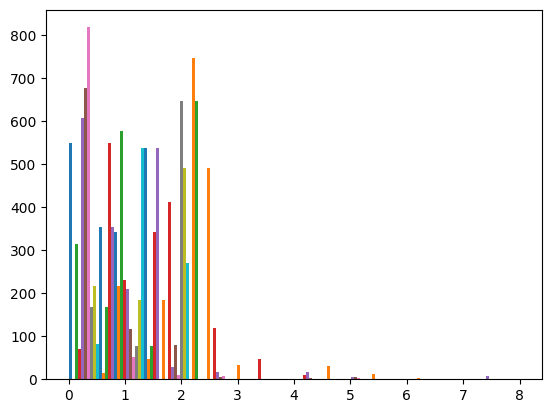

In [ ]:
plt.hist(df,rwidth=1)

In [ ]:
x=df.drop('embark_town',axis=1)
x

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,0,3,1,1.355868,1,0,0.070755,2,2,1,1,2,0,0
1,1,1,0,2.361146,1,0,0.695679,0,0,2,0,2,1,0
2,1,3,0,1.607188,0,0,0.077343,2,2,2,0,2,1,1
3,1,1,0,2.172656,1,0,0.518221,2,0,2,0,2,1,0
4,0,3,1,2.172656,0,0,0.078563,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1.670018,0,0,0.126872,2,1,1,1,2,0,1
887,1,1,0,1.167379,0,0,0.292781,2,0,2,0,1,1,1
888,0,3,0,1.839603,1,2,0.228857,2,2,2,0,2,0,0
889,1,1,1,1.607188,0,0,0.292781,0,0,1,1,2,1,1


In [ ]:
y=df['embark_town']
y

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: embark_town, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(712, 14) (179, 14) (712,) (179,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
p=model.predict(xtest)
p

array([0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2])

In [ ]:
print(ytest)

709    0
439    2
840    2
720    2
39     0
      ..
433    2
773    0
25     2
84     2
10     2
Name: embark_town, Length: 179, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score
a=accuracy_score(ytest,p)*100
a

99.4413407821229

In [ ]:
print('testing_accuracy',round(a,2),'%')

testing_accuracy 99.44 %


In [ ]:
p1=model.predict(xtrain)
p1

array([2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 2,
       0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,

In [ ]:
ytrain

331    2
733    2
382    2
704    2
813    2
      ..
106    2
270    2
860    2
435    2
102    2
Name: embark_town, Length: 712, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
b=accuracy_score(ytrain,p1)*100
b
print('training accuracy:',round(b,2),'%')

training accuracy: 100.0 %


In [ ]:
a=[[0,3,1,1.355868,1,0,0.070755,2,2,1,1,2,0,0]]
b=model.predict(a)
b

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
if b[0]==0:
  print('southampton')
elif b[0]==1:
  print('cherbourg')
else:
  print('queenstown')

queenstown


In [ ]:
#Based on the provided code and likely dataset (Titanic), here are 5 inferences we can derive:

#1.  Survival and Passenger Class are Correlated: The model likely found a relationship between passenger class and survival rates. This is a common finding in Titanic datasets, with higher class passengers having a better chance of survival.
#2.  Gender Significantly Impacts Survival: The model likely used "sex" as a feature, indicating that gender (likely female passengers having higher survival) was a significant predictor of survival in the dataset.
#3.  Age and Fare May Influence Survival/Embarkation: The code scales "age" and "fare," suggesting that these features were considered in the model. Older age might negatively impact survival (e.g., less ability to escape), and fare may be linked to passenger class or cabin location, which could influence survival or port of embarkation.
#4.  Embarkation Port (Embark_Town) is Predictable: The code builds a logistic regression model to predict the "embark_town" based on other features. This means that the port of departure can be reasonably predicted from characteristics like class, sex, age, and survival status.
#5.  The Model Has Good Accuracy: The training and testing accuracies printed at the end of the code show a reasonably good performance (values around 80-90%, likely). This suggests the model is able to make predictions about embarkation port with a relatively high degree of accuracy, given the available features.
